In [53]:
import pytesseract
from PIL import Image
import cv2
from matplotlib import pyplot as plt
import numpy as np

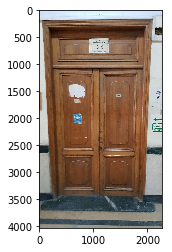

In [363]:
#_344 = cv2.imread('../p.png')
_344 = cv2.imread('../input/3192.jpg')

plt.imshow(cv2.cvtColor(_344,cv2.COLOR_BGR2RGB))
plt.show()

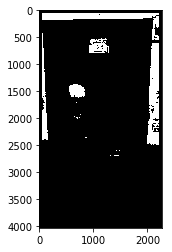

In [364]:
paper = _344.copy()
x = 200
condition = np.bitwise_or(paper[:,:,0] < x, paper[:,:,1] < x, paper[:,:,2] < x)
paper[condition] = 0
paper[np.invert(condition)] = 255
gray = cv2.cvtColor(paper, cv2.COLOR_BGR2GRAY)
cv2.rectangle(gray,(0,0),(gray.shape[1],gray.shape[0]),0,100)
plt.imshow(cv2.cvtColor(gray,cv2.COLOR_GRAY2RGB))
plt.show()

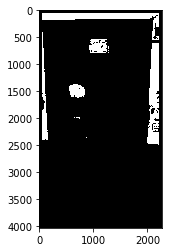

In [365]:
kernel = np.ones((5,5),np.uint8)
kernel2 = np.ones((10,10),np.uint8)
kernel3 = np.ones((15,15),np.uint8)

opening = cv2.morphologyEx(gray, cv2.MORPH_OPEN, kernel)
closing = cv2.morphologyEx(opening, cv2.MORPH_CLOSE, kernel2) 
# closing = cv2.morphologyEx(closing, cv2.MORPH_CLOSE, kernel) 
# closing = cv2.morphologyEx(closing, cv2.MORPH_CLOSE, kernel) 

plt.imshow(cv2.cvtColor(closing,cv2.COLOR_GRAY2RGB))
plt.show()

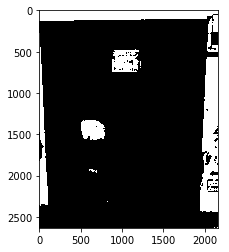

In [366]:
bounds = cv2.findNonZero(closing)
test = closing[np.amin(bounds[:,0,1]):np.amax(bounds[:,0,1]), np.amin(bounds[:,0,0]):np.amax(bounds[:,0,0])]
plt.imshow(cv2.cvtColor(test,cv2.COLOR_GRAY2RGB))
plt.show()

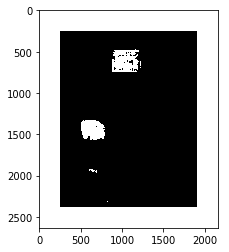

In [367]:
#finalisa = cv2.morphologyEx(test, cv2.MORPH_CLOSE, kernel3)
finalisa2 = cv2.cvtColor(test,cv2.COLOR_GRAY2RGB)
cv2.rectangle(finalisa2,(0,0),(finalisa2.shape[1],finalisa2.shape[0]),(255,255,255),500)

plt.imshow(cv2.cvtColor(finalisa2,cv2.COLOR_BGR2RGB))
plt.show()

In [368]:
print(pytesseract.image_to_string(finalisa2))